In [29]:
import pandas as pd 
import json 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import xlsxwriter
from io import BytesIO




In [30]:
f = open('data/data2.json')

In [31]:
data = json.load(f)

In [32]:
l=[]
for i in range(1,100):
    try:
        l.append((data['KeyEvents']['event {}'.format(i)]['distance'],
                  data['KeyEvents']['event {}'.format(i)]['refl loss'],
                  data['KeyEvents']['event {}'.format(i)]['splice loss'],
                  data['KeyEvents']['event {}'.format(i)]['peak'],
                  data['KeyEvents']['event {}'.format(i)]['end of curr'],
                  data['KeyEvents']['event {}'.format(i)]['end of prev'],
                  data['KeyEvents']['event {}'.format(i)]['slope'],
                  data['KeyEvents']['event {}'.format(i)]['start of curr'],
                  data['KeyEvents']['event {}'.format(i)]['start of next'],
                  data['KeyEvents']['event {}'.format(i)]['type']))
    except:
        break
    

df = pd.DataFrame(l, columns =['Distance','ReflectionLoss','SpliceLoss','Peak','EndOfCurr','EndOfPrev','Slope','StartOfCurr','StartOfNext','Type'])
# df.to_excel('data1.xlsx',index=False)
df

,Distance,ReflectionLoss,SpliceLoss,Peak,EndOfCurr,EndOfPrev,Slope,StartOfCurr,StartOfNext,Type
0,0.000,-30.170,0.000,0.003,0.012,0.000,0.000,0.000,0.629,1F9999LS {auto} reflection
1,0.629,-19.462,0.693,0.632,0.730,0.012,0.776,0.629,0.985,2F9999LS {auto} multiple
2,0.985,-32.049,1.329,0.988,1.003,0.730,1.700,0.985,1.128,1F9999LS {auto} reflection
3,1.128,-50.905,0.674,1.132,1.139,1.003,1.700,1.128,1.254,1F9999LS {auto} reflection
4,1.254,-25.901,1.003,1.264,1.277,1.139,0.931,1.254,1.281,1F9999LS {auto} reflection
5,1.281,-42.231,0.000,1.283,1.371,1.277,1.700,1.281,1.613,1E9999LS {auto} reflection
6,1.613,-46.333,0.000,1.618,1.625,1.371,1.700,1.613,1.637,1F9999LS {auto} reflection
7,1.637,-46.513,0.000,1.638,1.643,1.625,0.250,1.637,1.887,1F9999LS {auto} reflection
8,1.887,-41.885,0.000,1.894,1.899,1.643,1.700,1.887,1.908,1F9999LS {auto} reflection
9,1.908,-47.641,0.000,1.916,1.919,1.899,1.700,1.908,2.502,1F9999LS {auto} reflection


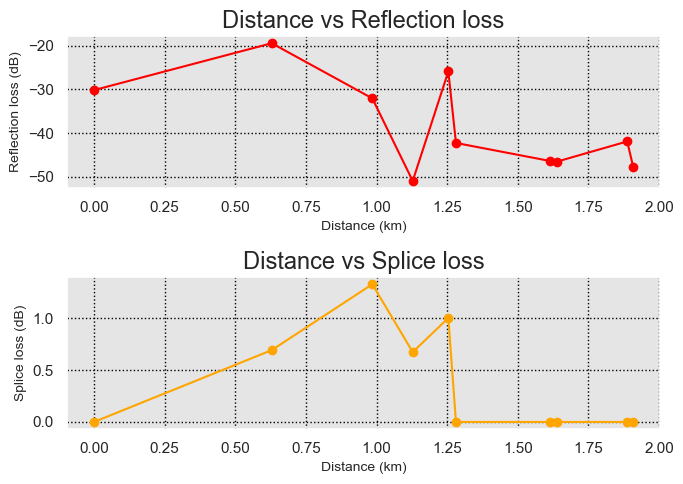

In [39]:
fig,ax=plt.subplots(2,1)
fig.set_size_inches(7,5)
fig.set_tight_layout('tight')
sns.set_theme()
sns.set(rc={'axes.facecolor':'#e5e5e5','figure.facecolor':'#ffffff','grid.color': '#efefef','grid.linestyle':'dotted'})


x=df['Distance'].to_list()
y=df['ReflectionLoss'].to_list()
z=df['SpliceLoss'].to_list()

x=[float(i) for i in x]
y=[float(i) for i in y]
z=[float(i) for i in z]

ax[0].plot(x,y,'red',marker='o',linewidth=1.5)
ax[1].plot(x,z,'orange',marker='o',linewidth=1.5)

ax[0].set_xlabel('Distance (km)',fontsize=10)
ax[1].set_xlabel('Distance (km)',fontsize=10)
ax[0].set_ylabel('Reflection loss (dB)',fontsize=10)
ax[1].set_ylabel('Splice loss (dB)',fontsize=10)
ax[1].set_title('Distance vs Splice loss',fontsize=17)
ax[0].set_title('Distance vs Reflection loss',fontsize=17)

ax[0].grid(True)
ax[1].grid(True)
plt.tight_layout()

plt.savefig("mygraph.png")

In [26]:
import xlsxwriter
from io import BytesIO

writer = pd.ExcelWriter('data.xlsx', engine='xlsxwriter')
df.to_excel(writer, sheet_name='Sheet1', startrow=9, header=True,index=False)
 
workbook = writer.book
 
# By default worksheet names in the spreadsheet will be
# Sheet1, Sheet2 etc., but we can also specify a name.
worksheet = writer.sheets["Sheet1"]
 
# Some data we want to write to the worksheet.
out=(['Date/time',data['FxdParams']['date/time'][0:19]],
     ['Wavelength',data['FxdParams']['wavelength']],
     ['Pulse width',data['FxdParams']['pulse width']],
     ['Range',data['FxdParams']['range']]) 

# Start from the first cell. Rows and
# columns are zero indexed.

worksheet.write(0,7,'OTDR data ')

row = 2
col = 0
 
# Iterate over the data and write it out row by row.
for field,value in (out):
    worksheet.write(row, col, field)
    worksheet.write(row, col + 1, value)
    row += 1

chart = workbook.add_chart({'type': 'line'})
# df.to_excel(worksheet,sheet_name='My Sheet',startrow=7,header=False)

filename = 'fig.jpg'

file = open(filename, 'rb')
data = BytesIO(file.read())
file.close()
worksheet.insert_image('N10', filename, {'image_data': data})
 
workbook.close()